<a href="https://colab.research.google.com/github/NidhiSrikanth/Class-75/blob/main/class_122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import heatmap


ModuleNotFoundError: ignored

In [3]:
X,y = fetch_openml("mnist_784", version= 1, return_X_y= True)
print(pd.Series(y).value_counts())
classes= ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
n_classes= len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


NameError: ignored

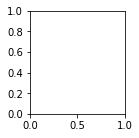

In [13]:
sample_per_class= 5
figure= plt.figure(figsize=(n_classes*2, (1+sample_per_class * 2)))
idx_cls= 0
for cls in classes:
  idxs= np.flatnonzero(y==cls)
  idxs= np.random.choice(idxs, sample_per_class, replace= False)
  i= 0
  for idx in idxs:
    plt_idx= i*n_classes*idx_cls+1
    p= plt.subplot(sample_per_class, n_classes, plt_idx)
    hm=heatmap.Heatmap()
    p= hm.heatmap(np.reshape(X[idx],(20,20)),cmap= plt.cm.gray,
                  xticklabels= False, yticklabels= False, cbar= False)
    p= plt.axis("off")
    i+= 1
  idx_cls+=1

In [10]:
print(len(X))
print(len( X[0]))

70000


KeyError: ignored

In [ ]:
print(X[0])
print(y[0])


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state= 9, train_size= 7500, test_size= 2500)
X_train_scaled= X_train/ 255.0
X_test_scaled= X_test/ 255.0


In [ ]:
clf= LogisticRegression(solver= "saga", multi_class="multinomial").fit(X_train_scaled, y_train)

In [ ]:
y_pred= clf.predict(X_test_scaled)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)